#**Import Libraries and data**

In [121]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/Stars.csv')

#**Data Exploration and Preprocessing**

In [3]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


**Features:**

- Temperature in K
- L: Luminosity of Sun
- R: Radius of Sun
- Color: General Color of Spectrum
- A_M: Absolute Magnitude
- Spectral Class: Scale of Diminishing Surface Temperature

**Target**

- Red Dwarf: 0
- Brown Dwarf: 1
- White Dwarf: 2
- Main Sequence: 3
- Super Giants: 4
- Hyper Giants: 5


In [4]:
c = data['Type'].unique()
c

array(['Red Dwarf', 'White  Dwarf', 'Main Sequence', 'Super Giants',
       'Hyper Giants'], dtype=object)

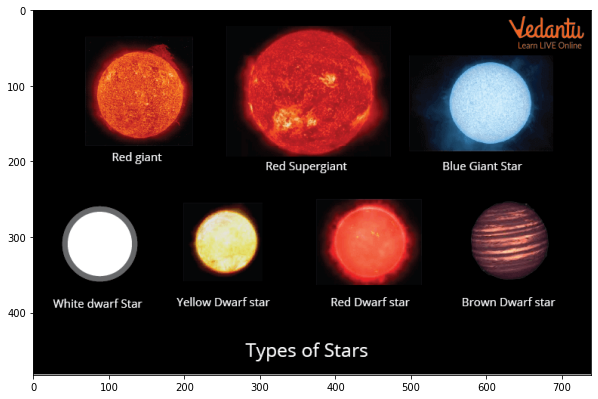

In [5]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
img = mpimg.imread('/content/download.png')
plt.imshow(img)

In [6]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


# **Data Visualization**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

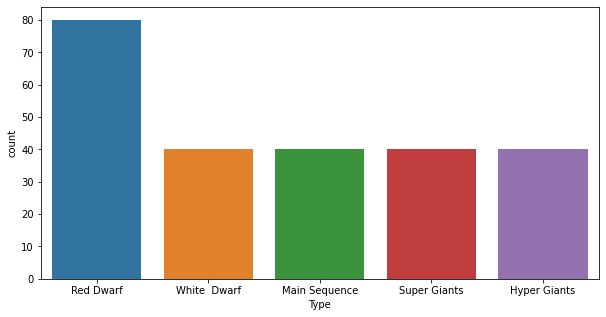

In [9]:
plt.figure(figsize=(10,5))

sns.countplot(data['Type'])
plt.ylabel('Type')
plt.ylabel('count')

Text(0.5, 1.0, 'Type of Sun vs Temeperature \n')

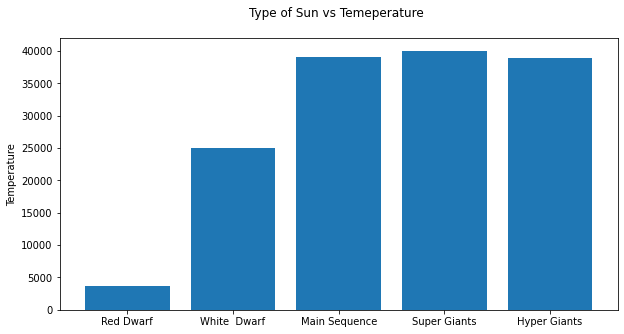

In [10]:
plt.figure(figsize=(10,5))

plt.bar(data['Type'], data['Temperature'])
plt.ylabel('Type')
plt.ylabel('Temperature')
plt.title('Type of Sun vs Temeperature \n')

In [11]:
max(data['R']), min(data['R'])

(1948.5, 0.0084)

Text(0.5, 1.0, 'Type of Sun vs Radius \n')

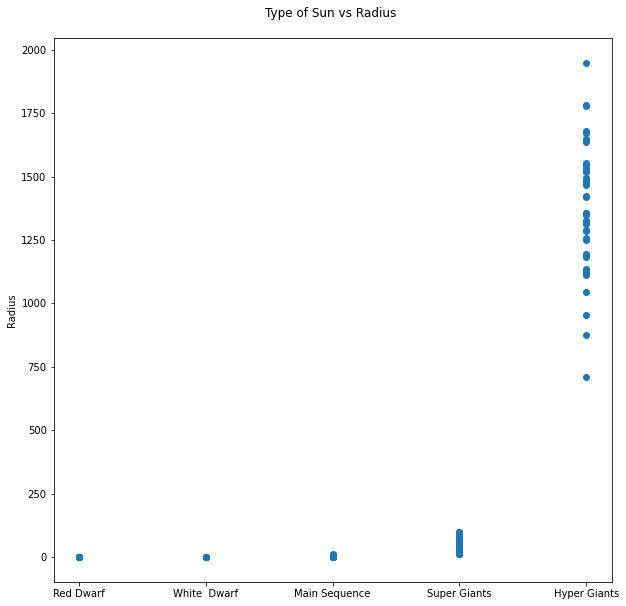

In [12]:
plt.figure(figsize=(10,10))

plt.scatter(data['Type'], data['R'])
plt.ylabel('Type')
plt.ylabel('Radius')
plt.title('Type of Sun vs Radius \n')

<AxesSubplot:>

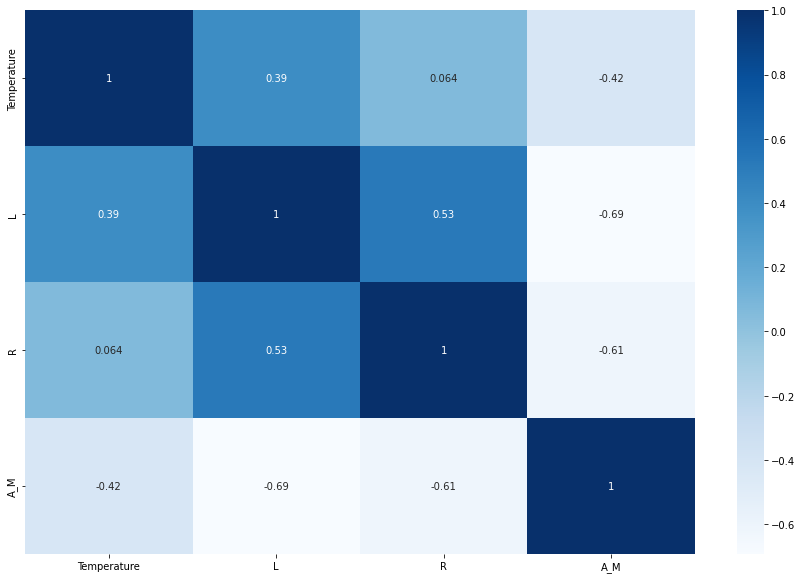

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

#**Feature Engineering**

In [14]:
data['Color'].values

array(['Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Blue White', 'White', 'White', 'White',
       'Blue White', 'Yellowish White', 'Blue white', 'Yellowish White',
       'Yellowish White', 'Pale yellow orange', 'Blue', 'Blue-white',
       'Blue-white', 'Whitish', 'yellow-white', 'Whitish', 'yellow-white',
       'yellow-white', 'yellow-white', 'yellow-white', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Red',
       'Red', 'Red', 'Orange', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'White-Yellow', 'White', 'white', 'Blue White',
       'Blue White', 'Blue White', 'Blue White', 'Blue White', 'white',
       'Blue', 'yellow-white', 'yellowish', 'yellowish', 'Yellowish',
       'Blue-whi

In [15]:
data['Spectral_Class'].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'A', 'F', 'A', 'B', 'F',
       'A', 'F', 'F', 'F', 'O', 'B', 'B', 'B', 'F', 'A', 'F', 'F', 'F',
       'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'F', 'F', 'A', 'B', 'B', 'A', 'B', 'B', 'F', 'B', 'F',
       'K', 'K', 'K', 'A', 'A', 'K', 'F', 'A', 'O', 'B', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'M', 'M', 'M', 'M', 'M', 'M', 'K',
       'M', 'G', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'A', 'B', 'F', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'A', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'M', 'M', 'K', 'B', 'M', 'M', 'O', 'B', 'B', 'B', 'M

In [16]:
# Encode Color and Spectral_Class
label_encoder = preprocessing.LabelEncoder()
 
data['Color']= label_encoder.fit_transform(data['Color'])
data['Spectral_Class']= label_encoder.fit_transform(data['Spectral_Class'])

In [17]:
data['Spectral_Class'].values

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 6, 1, 1, 1, 2, 0, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 4, 4, 4, 0, 0, 4, 2, 0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 1, 5, 5,
       6, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 6, 6, 0, 1, 1, 2,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 1, 6, 6, 0, 0, 6])

In [18]:
data['Color'].values

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  1,  9,  9,  9,  1, 13,  2, 13, 13,  7,  0,  4,  4, 11,
       15, 11, 15, 15, 15, 15,  8,  8,  8,  8,  8,  8,  8,  8,  8,  0,  8,
        8,  8,  5,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10,  9, 14,  1,  1,
        1,  1,  1, 14,  0, 15, 16, 16, 12,  4,  4,  6, 15,  4,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  1,  0,  0,  1,  2,  2,  2, 14,  9,  1,  4,  3,  4,
        4,  4,  4,  4,  4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  5,  0,  8,  8,  0,  4,  4,  4,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  4,  4,  4,  4,  0,  0,  4,  4,  4, 15,  0,
        0,  0,  0,  0,  0

In [19]:
# Encode Type
data.replace(
    {'Type': 
     {
         'Red Dwarf': 0,
         'Brown Dwarf': 1,
         'White Dwarf': 2,
         'White  Dwarf': 2,
         'Main Sequence': 3,
         'Super Giants': 4,
         'Hyper Giants': 5,
      }
     }, 
     inplace=True)

#**Train Model**

In [50]:
X = data.drop("Type",axis=1)
y = data["Type"]

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [126]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
X_train

array([[4.76340611e-02, 2.46050246e-01, 4.90118407e-01, 2.12632896e-02,
        5.00000000e-01, 8.33333333e-01],
       [0.00000000e+00, 6.82818865e-11, 4.85503761e-05, 1.00000000e+00,
        5.00000000e-01, 8.33333333e-01],
       [3.68618796e-02, 1.67172894e-09, 1.53246747e-04, 7.43902439e-01,
        5.00000000e-01, 8.33333333e-01],
       ...,
       [4.38243872e-02, 1.76591086e-10, 1.90711625e-04, 6.96060038e-01,
        5.00000000e-01, 8.33333333e-01],
       [3.18462468e-01, 1.28558301e-03, 2.94412355e-03, 3.08943089e-01,
        2.50000000e-01, 0.00000000e+00],
       [5.96174562e-01, 4.27350427e-01, 3.23283919e-02, 1.90431520e-01,
        0.00000000e+00, 1.00000000e+00]])

In [128]:
y_train

58     5
4      0
77     0
186    0
70     0
      ..
200    2
184    0
131    0
152    3
106    4
Name: Type, Length: 192, dtype: int64

In [129]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

leaves = {'criterion':['gini','entropy'],'max_depth':[5, 10, 50, 100], 'min_samples_leaf':[2,10,50]}
clf = GridSearchCV(DecisionTreeClassifier(), leaves)
clf.fit(X_train, y_train)

clf.best_params_

{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 2}

In [130]:
cross_val_score(clf, X_train, y_train, cv=3)

array([1.      , 0.984375, 1.      ])

In [131]:
model = DecisionTreeClassifier(criterion =  'entropy', max_depth =  100, min_samples_leaf =  2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=2)

In [132]:
y_pred = model.predict(X_train)

In [133]:
acc = accuracy_score(y_train,y_pred)
acc

1.0

In [134]:
test_pred = model.predict(X_test)

In [135]:
acc2 = accuracy_score(y_test,test_pred)
acc2

1.0

#**Plot Results**

[Text(0.5, 0.875, 'x[3] <= 0.633\nentropy = 2.27\nsamples = 192\nvalue = [60, 33, 33, 31, 35]'),
 Text(0.25, 0.625, 'x[3] <= 0.138\nentropy = 1.583\nsamples = 99\nvalue = [0, 0, 33, 31, 35]'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 0, 0, 35]'),
 Text(0.375, 0.375, 'x[2] <= 0.006\nentropy = 0.999\nsamples = 64\nvalue = [0, 0, 33, 31, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33, 0, 0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.625, 'x[2] <= 0.0\nentropy = 0.938\nsamples = 93\nvalue = [60, 33, 0, 0, 0]'),
 Text(0.625, 0.375, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0, 0]'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 60\nvalue = [60, 0, 0, 0, 0]')]

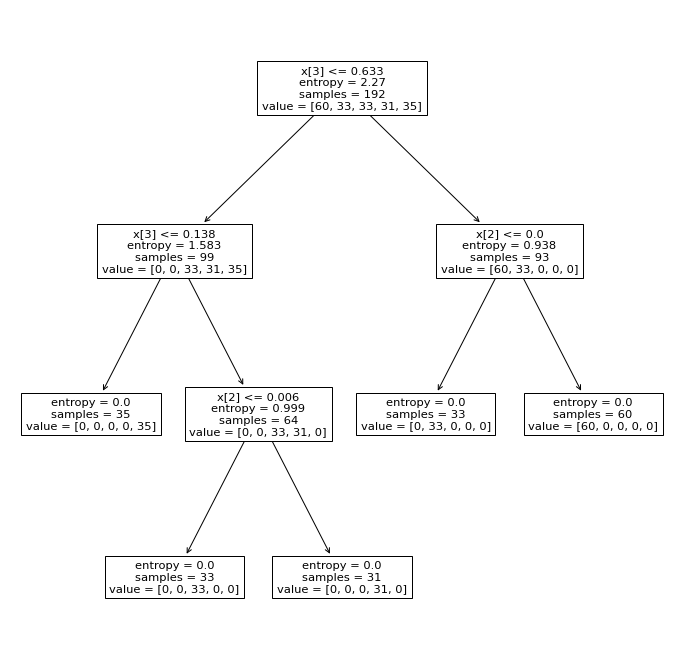

In [136]:
from sklearn import tree
     
plt.figure(figsize=(12,12))
tree.plot_tree(model)

## **Now let us try testing on Minkata, which along with Alnitak and Alnilam, forms Orion's Belt**

In [137]:
input_data = (3192, 0.0084, 541, -5.8, 6, 4)

# input data to a numpy array
input_data = np.asarray(input_data)

# reshape  data as we are predicting the label for only one instance
input_data = input_data.reshape(1,-1)

prediction = model.predict(input_data)
print(prediction)

print(c[prediction-1])

[5]
['Hyper Giants']


**As we can see the model predicted that Minkata is a Hyper Giant and in fact Mintaka is a Giand**


note: Minkata is more of a blue giant, but it is not one of the options

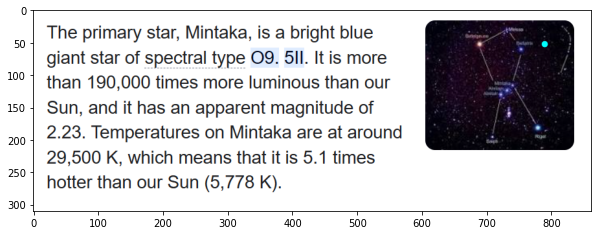

In [138]:
plt.figure(figsize=(10,10))
img = mpimg.imread('/content/st.PNG')
plt.imshow(img)